# Pieces of code

Retrouvez et testez ici les morceaux de code présentés dans le dossier.
Lancez ce fichier dans un binder depuis mon repo gitHub, ou récupérez-y le fichier **"nat2018_epured_5k.csv"** sur lequel il est basé.

In [20]:
import csv
import matplotlib
import matplotlib.pyplot as plt
from operator import itemgetter

## Généralités
Ci-dessous les quelques lignes de code utilisées en exemple dans la partie générale.

In [ ]:
# Liste
# Délimité par les brackets [] et valeurs séparées par ,
ma_liste = [ "élément 1", "élément 2", "élément 3"]
# Pour une liste, la clé est l'index de position de la donnée :
ma_liste[1]

In [ ]:
# Dictionnaire
# Délimité par les brackets {} et valeurs séparées par ,
mon_dico = {"clé 0": "élément 1", 
            "clé 1": "élément 2", 
            "clé 2": "élément 3"}
# Pour un dico la clé d'accès à la donnée
# est explicitée à la création :
mon_dico["clé 1"]

In [ ]:
# Parcourir les valeurs de la liste :
print("Liste :")
for valeur in ma_liste :
    print(valeur)

# Parcourir les valeurs du dictionnaire :
print("Dictionnaire :")
for cle in mon_dico.keys():
    print(mon_dico[cle])


## Analyse de la Structure A
Ci-dessous le code de la liste de liste :

In [14]:
def l2l_importer_donnees(fichier):
    with open(fichier, encoding='utf-8-sig') as nat_file:
        nat_data = csv.reader(nat_file, delimiter=';')
        nat_list = []
        for row in nat_data:
            if nat_data.line_num == 1:
                nat_list.append(row)
            else:
                nat_list.append([row[0], row[1], int(row[2]), int(row[3])])
    return nat_list

In [15]:
def l2l_ages_moyens(datas):
    aver_ages = [["sex", "name", "average_age"], 
                 [datas[1][0], datas[1][1]]]     # Initialisation du premier nom de la liste
    sum_ages, sum_count = 0, 0                   # Initialisation des variables de comptage
    
    for record in datas[1:]:
        if record[0:2] == aver_ages[-1][0:2]: # Si le sexe et le nom sont égaux à l'enregistrement en cours
            sum_ages = sum_ages + (2020 - record[2]) * record[3]   # Calcul de l'age pondéré par l'effectif
            sum_count = sum_count + record[3]                      # Calcul des effectifs totaux (dénominateur)
        else:
            aver_ages[-1].append(sum_ages / sum_count) # Si le nom change on ajoute l'age moyen à la dernière ligne
            aver_ages.append([record[0], record[1]])   # Ajout du nouveau nom dans une nouvelle ligne
            sum_ages = (2020 - record[2]) * record[3]  # Calcul du premier age pondéré
            sum_count = record[3]                      # Initialisation de la somme des effectifs
    
    aver_ages[-1].append(sum_ages / sum_count) # On met à jour l'age moyen du dernier prénom dans la dernière ligne
    return aver_ages

In [16]:
l2l = l2l_importer_donnees("nat2018_epured_5k.csv")
l2l_avg = l2l_ages_moyens(l2l)
l2l_avg.pop(0)

['sex', 'name', 'average_age']

La méthode élégante de tri :

In [ ]:
# Utilisation de la fonction lambda
sorted(l2l_avg, key=lambda elem:elem[2])

La méthode moins élégante de tri

In [ ]:
for line in l2l_avg:
    # Pour chaque ligne de la liste, on pop la moyenne
    # pour l'insérer en première position.
    line.insert(0, line.pop(2))

# Puis on procède au tri
sorted(l2l_avg)

## Analyse de la structure B
Le code pour la liste de dicos :

In [1]:
def l2d_importer_donnees(fichier):
    with open(fichier, encoding='utf-8-sig') as nat_file:
        nat_data = csv.reader(nat_file, delimiter=';')
        nat_list = []
        for row in nat_data:
            if nat_data.line_num != 1:
                nat_list.append({"sexe": row[0], "prenom": row[1], "annee": int(row[2]), "effectif": int(row[3])})
    return nat_list

In [2]:
def l2d_ages_moyens(datas):
    aver_ages = [{"sexe": datas[0]["sexe"], "prenom": datas[0]["prenom"]}]  # Initialisation du premier nom de la liste
    sum_ages, sum_count = 0, 0                                        # Initialisation des variables de comptage
    
    for record in datas:
        if (record["sexe"], record["prenom"]) == (aver_ages[-1]["sexe"], aver_ages[-1]["prenom"]): 
            # Si le sexe et le nom sont égaux à l'enregistrement en cours
            sum_ages = sum_ages + (2020 - record["annee"]) * record["effectif"]   # Calcul de l'age pondéré par l'effectif
            sum_count = sum_count + record["effectif"]                            # Calcul des effectifs totaux (dénominateur)
        else:
            # Si le nom change on ajoute l'age moyen à la dernière ligne
            aver_ages[-1]["average"] = sum_ages / sum_count 
            aver_ages.append({"sexe": record["sexe"], "prenom": record["prenom"]})   # Ajout du nouveau nom dans une nouvelle ligne
            sum_ages = (2020 - record["annee"]) * record["effectif"]                  # Calcul du premier age pondéré
            sum_count = record["effectif"]                                           # Initialisation de la somme des effectifs
    
    aver_ages[-1]["average"] = sum_ages / sum_count  # On met à jour l'age moyen du dernier prénom dans la dernière ligne
    return aver_ages

In [5]:
l2d = l2d_importer_donnees("nat2018_epured_5k.csv")
l2d_avg = l2d_ages_moyens(l2d)
l2d_avg[5:15]

[{'sexe': '1', 'prenom': 'ADAM', 'average': 11.596738006205744},
 {'sexe': '1', 'prenom': 'ADEL', 'average': 20.145937385796078},
 {'sexe': '1', 'prenom': 'ADELAIDE', 'average': 82.01234567901234},
 {'sexe': '1', 'prenom': 'ADEM', 'average': 10.29983931440814},
 {'sexe': '1', 'prenom': 'ADIL', 'average': 21.978744341665028},
 {'sexe': '1', 'prenom': 'ADOLPHE', 'average': 101.40999086201644},
 {'sexe': '1', 'prenom': 'ADRIAN', 'average': 19.387514958117272},
 {'sexe': '1', 'prenom': 'ADRIEN', 'average': 43.17934882625306},
 {'sexe': '1', 'prenom': 'ADÈLE', 'average': 87.44444444444444},
 {'sexe': '1', 'prenom': 'AGATHE', 'average': 86.06875}]

La méthode intermédiare de tri avec itemgetter :

In [6]:
# Utilisation de la fonction itemgetter()
sorted(l2d_avg, key=itemgetter("average"))

[{'sexe': '2', 'prenom': 'ADEL', 'average': 2.0},
 {'sexe': '2', 'prenom': 'ELIOTT', 'average': 2.5},
 {'sexe': '2', 'prenom': 'MAX', 'average': 3.7916666666666665},
 {'sexe': '2', 'prenom': 'TONY', 'average': 4.0},
 {'sexe': '1', 'prenom': 'ELIANE', 'average': 4.333333333333333},
 {'sexe': '2', 'prenom': 'CÔME', 'average': 4.379310344827586},
 {'sexe': '1', 'prenom': 'EMY', 'average': 5.0},
 {'sexe': '1', 'prenom': 'NAËL', 'average': 5.296526189698356},
 {'sexe': '1', 'prenom': 'THAÏS', 'average': 5.404907975460123},
 {'sexe': '2', 'prenom': 'MALO', 'average': 5.411764705882353},
 {'sexe': '1', 'prenom': 'NAÏM', 'average': 5.437688821752266},
 {'sexe': '1', 'prenom': 'KAÏS', 'average': 5.467706013363029},
 {'sexe': '2', 'prenom': 'NAËL', 'average': 5.615384615384615},
 {'sexe': '2', 'prenom': 'LYAM', 'average': 5.685714285714286},
 {'sexe': '2', 'prenom': 'ZÉLIE', 'average': 5.84526218951242},
 {'sexe': '1', 'prenom': 'EDEN', 'average': 5.874283530760413},
 {'sexe': '2', 'prenom': 'MI

## Analyse de la Structure C
Ci-dessous les morceaux de code pour le dictionnaire de dictionnaires de listes

In [28]:
def d2d2l_importer_donnees(fichier):
    with open(fichier, encoding='utf-8-sig') as nat_file:
        nat_data = csv.reader(nat_file, delimiter=';')
        nat_dict = dict()
        for row in nat_data:
            if nat_data.line_num != 1 and row[2]!="XXXX":
                genre = int(row[0]) - 1 # Conversion : 0 = homme, 1 = Femme
                prenom = row[1]
                annee = int(row[2])
                # Si le prénom n'est pas présent dans la structure : intialisation
                if prenom not in nat_dict:
                    nat_dict[prenom] = {annee: [0,0]}
                    
                # Si l'annee n'existe pas encore pour le prénom en cours : initialisation
                if annee not in nat_dict[prenom]: # l'année n'est pas créée
                    nat_dict[prenom][annee] = [0,0]
                
                # Valorisation de l'effectif
                nat_dict[prenom][annee][genre] = int(row[3])
                        
    return nat_dict

In [3]:
def d2d2l_ages_moyens(data):
    aver_ages = dict()
    for name in data.keys():
        calc = {0: {"sum_ages": 0, "sum_births": 0}, 
                1: {"sum_ages": 0, "sum_births": 0}}
        # Parcours des années enregistrées pour le prénom
        for year in data[name].keys():
            # Calcul des variables pour hommes puis femmes
            for gender, births in enumerate(data[name][year]):
                calc[gender]["sum_ages"] += (2020 - year) * births  # Somme des ages pondérée par les naissances
                calc[gender]["sum_births"] += births                # Somme des naissances
        
        # Initalisation du dictionnaire pour le prénom en cours
        aver_ages[name] = dict()
        
        # Calcul de l'age moyen pondéré total
        total_ages   = calc[0]["sum_ages"] + calc[1]["sum_ages"]
        total_births = calc[0]["sum_births"] + calc[1]["sum_births"]
        aver_ages[name]["total"] = total_ages / total_births
        
        # Gestion du cas de division par 0 et calcul pour hommes et femmes
        if calc[0]["sum_births"] != 0:
            aver_ages[name]["hommes"] = calc[0]["sum_ages"] / calc[0]["sum_births"]
        
        if calc[1]["sum_births"] != 0:
            aver_ages[name]["femmes"] = calc[1]["sum_ages"] / calc[1]["sum_births"]        
    
    return aver_ages

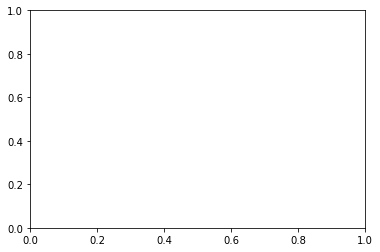

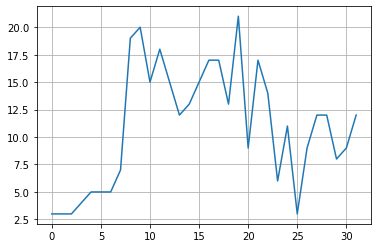

In [30]:
d2d2l = d2d2l_importer_donnees("nat2018.csv")
d2d2l_moy = d2d2l_ages_moyens(d2d2l)
histo = [x[1] for x in d2d2l["ODESSA"].values()]
fig, ax = plt.subplots()

fig, ax = plt.subplots()
ax.plot(histo)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()
plt.show()

In [32]:
d2d2l["ODESSA"]

{1982: [0, 3],
 1986: [0, 3],
 1987: [0, 3],
 1989: [0, 4],
 1991: [0, 5],
 1992: [0, 5],
 1993: [0, 5],
 1994: [0, 7],
 1995: [0, 19],
 1996: [0, 20],
 1997: [0, 15],
 1998: [0, 18],
 1999: [0, 15],
 2000: [0, 12],
 2001: [0, 13],
 2002: [0, 15],
 2003: [0, 17],
 2004: [0, 17],
 2005: [0, 13],
 2006: [0, 21],
 2007: [0, 9],
 2008: [0, 17],
 2009: [0, 14],
 2010: [0, 6],
 2011: [0, 11],
 2012: [0, 3],
 2013: [0, 9],
 2014: [0, 12],
 2015: [0, 12],
 2016: [0, 8],
 2017: [0, 9],
 2018: [0, 12]}

Création de la liste intermédiaire par compréhension :

In [11]:
total_list = [(key, averages['total']) 
              for key, averages in list(d2d2l_moy.items()) ]
total_list

[('AARON', 7.976177763174108),
 ('ABDALLAH', 22.743995633187772),
 ('ABDELKADER', 39.68284854563691),
 ('ABEL', 74.37685211070729),
 ('ACHILLE', 58.74089096658875),
 ('ADAM', 11.597291110263258),
 ('ADEL', 20.13709971995617),
 ('ADELAIDE', 60.91586901763224),
 ('ADEM', 10.29983931440814),
 ('ADIL', 21.978744341665028),
 ('ADOLPHE', 101.31506849315069),
 ('ADRIAN', 19.387514958117272),
 ('ADRIEN', 43.18007169303017),
 ('ADÈLE', 51.09786228108081),
 ('AGATHE', 24.555039013700874),
 ('AGNÈS', 63.188678910792795),
 ('AHMED', 31.058982817192653),
 ('AIME', 93.72035644380344),
 ('AIMÉE', 95.07717375734136),
 ('ALAIN', 65.57364099447993),
 ('ALAN', 23.296976617187113),
 ('ALBAN', 33.52345011452818),
 ('ALBERT', 95.47966906199945),
 ('ALBIN', 46.21220930232558),
 ('ALEX', 33.562055464926594),
 ('ALEXANDRA', 35.81297438330171),
 ('ALEXANDRE', 37.567965209277524),
 ('ALEXIS', 31.394111643562482),
 ('ALFRED', 97.13138852573653),
 ('ALI', 32.16237608545301),
 ('ALICE', 66.53483167072582),
 ('ALISO

Création de la liste intermédiaire sans rien comprendre :

In [12]:
total_list = list()
for key, averages in d2d2l_moy.items():
    total_list.append((key, averages['total']))
total_list

[('AARON', 7.976177763174108),
 ('ABDALLAH', 22.743995633187772),
 ('ABDELKADER', 39.68284854563691),
 ('ABEL', 74.37685211070729),
 ('ACHILLE', 58.74089096658875),
 ('ADAM', 11.597291110263258),
 ('ADEL', 20.13709971995617),
 ('ADELAIDE', 60.91586901763224),
 ('ADEM', 10.29983931440814),
 ('ADIL', 21.978744341665028),
 ('ADOLPHE', 101.31506849315069),
 ('ADRIAN', 19.387514958117272),
 ('ADRIEN', 43.18007169303017),
 ('ADÈLE', 51.09786228108081),
 ('AGATHE', 24.555039013700874),
 ('AGNÈS', 63.188678910792795),
 ('AHMED', 31.058982817192653),
 ('AIME', 93.72035644380344),
 ('AIMÉE', 95.07717375734136),
 ('ALAIN', 65.57364099447993),
 ('ALAN', 23.296976617187113),
 ('ALBAN', 33.52345011452818),
 ('ALBERT', 95.47966906199945),
 ('ALBIN', 46.21220930232558),
 ('ALEX', 33.562055464926594),
 ('ALEXANDRA', 35.81297438330171),
 ('ALEXANDRE', 37.567965209277524),
 ('ALEXIS', 31.394111643562482),
 ('ALFRED', 97.13138852573653),
 ('ALI', 32.16237608545301),
 ('ALICE', 66.53483167072582),
 ('ALISO

Tri de la liste avec itemgetter :

In [13]:
sorted(total_list, key=itemgetter(1))

[('NAËL', 5.298767301038063),
 ('NAÏM', 5.437688821752266),
 ('KAÏS', 5.467706013363029),
 ('ZÉLIE', 5.84526218951242),
 ('LYAM', 5.934876989869754),
 ('TIMÉO', 5.941138588356517),
 ('CÔME', 5.979103877838055),
 ('MYA', 6.011704253497003),
 ('NOÉ', 6.135313727824741),
 ('INAYA', 6.292197192295135),
 ('SOHAN', 6.304932735426009),
 ('MIA', 6.339250019988806),
 ('THAÏS', 6.354647535870243),
 ('MAËL', 6.432780099825508),
 ('IMRAN', 6.48896088312935),
 ('SOAN', 6.522549975621648),
 ('LYA', 6.844146516638736),
 ('ELÉNA', 6.846823669107461),
 ('MAËLYS', 6.860540388404165),
 ('MILA', 6.878273699741793),
 ('LENA', 6.983868935097669),
 ('INES', 7.014403110364937),
 ('RAPHAEL', 7.149564312654442),
 ('MALONE', 7.249213108683577),
 ('LEO', 7.309750450218678),
 ('LIAM', 7.320229480409414),
 ('TIMOTHÉ', 7.4358372456964),
 ('ISMAËL', 7.578881206788184),
 ('ALYA', 7.657174556213017),
 ('EDEN', 7.8450747581354445),
 ('MILO', 7.8839399930224445),
 ('GIULIA', 7.88703578008339),
 ('CHLOE', 7.90173765954175